Initial notebook to explore/transform the dataset if necessary and test implementations for answering the research questions

In [14]:
import pandas as pd
from helper_functions import process_source_data
import matplotlib.pyplot as plt
BASE_DIR = '/home/nils/Documents/Repositories/semester-10/rse/rse_24_individual_project/'

In [2]:
process_source_data('data/71211-0005_$F.csv', 'results/monthly_tax_data.csv', False)
process_source_data('data/71211-0003_$F.csv', 'results/quarterly_tax_data.csv', True)

df_m = pd.read_csv(BASE_DIR + 'results/monthly_tax_data.csv', index_col=0).astype('Int64')
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Steuereinnahmen insgesamt to Schankerlaubnissteuer
Columns: 312 entries, 1999-01 to 2024-12
dtypes: Int64(312)
memory usage: 46.8+ KB


In [3]:
df_q = pd.read_csv(BASE_DIR + 'results/quarterly_tax_data.csv', index_col=0).astype('Int64')
df_q.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Steuereinnahmen insgesamt to Schankerlaubnissteuer
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   1999-q1  12 non-null     Int64
 1   1999-q2  13 non-null     Int64
 2   1999-q3  13 non-null     Int64
 3   1999-q4  13 non-null     Int64
 4   2000-q1  13 non-null     Int64
 5   2000-q2  13 non-null     Int64
 6   2000-q3  13 non-null     Int64
 7   2000-q4  13 non-null     Int64
 8   2001-q1  13 non-null     Int64
 9   2001-q2  13 non-null     Int64
 10  2001-q3  13 non-null     Int64
 11  2001-q4  13 non-null     Int64
 12  2002-q1  13 non-null     Int64
 13  2002-q2  13 non-null     Int64
 14  2002-q3  13 non-null     Int64
 15  2002-q4  13 non-null     Int64
 16  2003-q1  13 non-null     Int64
 17  2003-q2  13 non-null     Int64
 18  2003-q3  13 non-null     Int64
 19  2003-q4  13 non-null     Int64
 20  2004-q1  13 non-null     Int64
 21  2004-q2  13 non-null     

<Axes: >

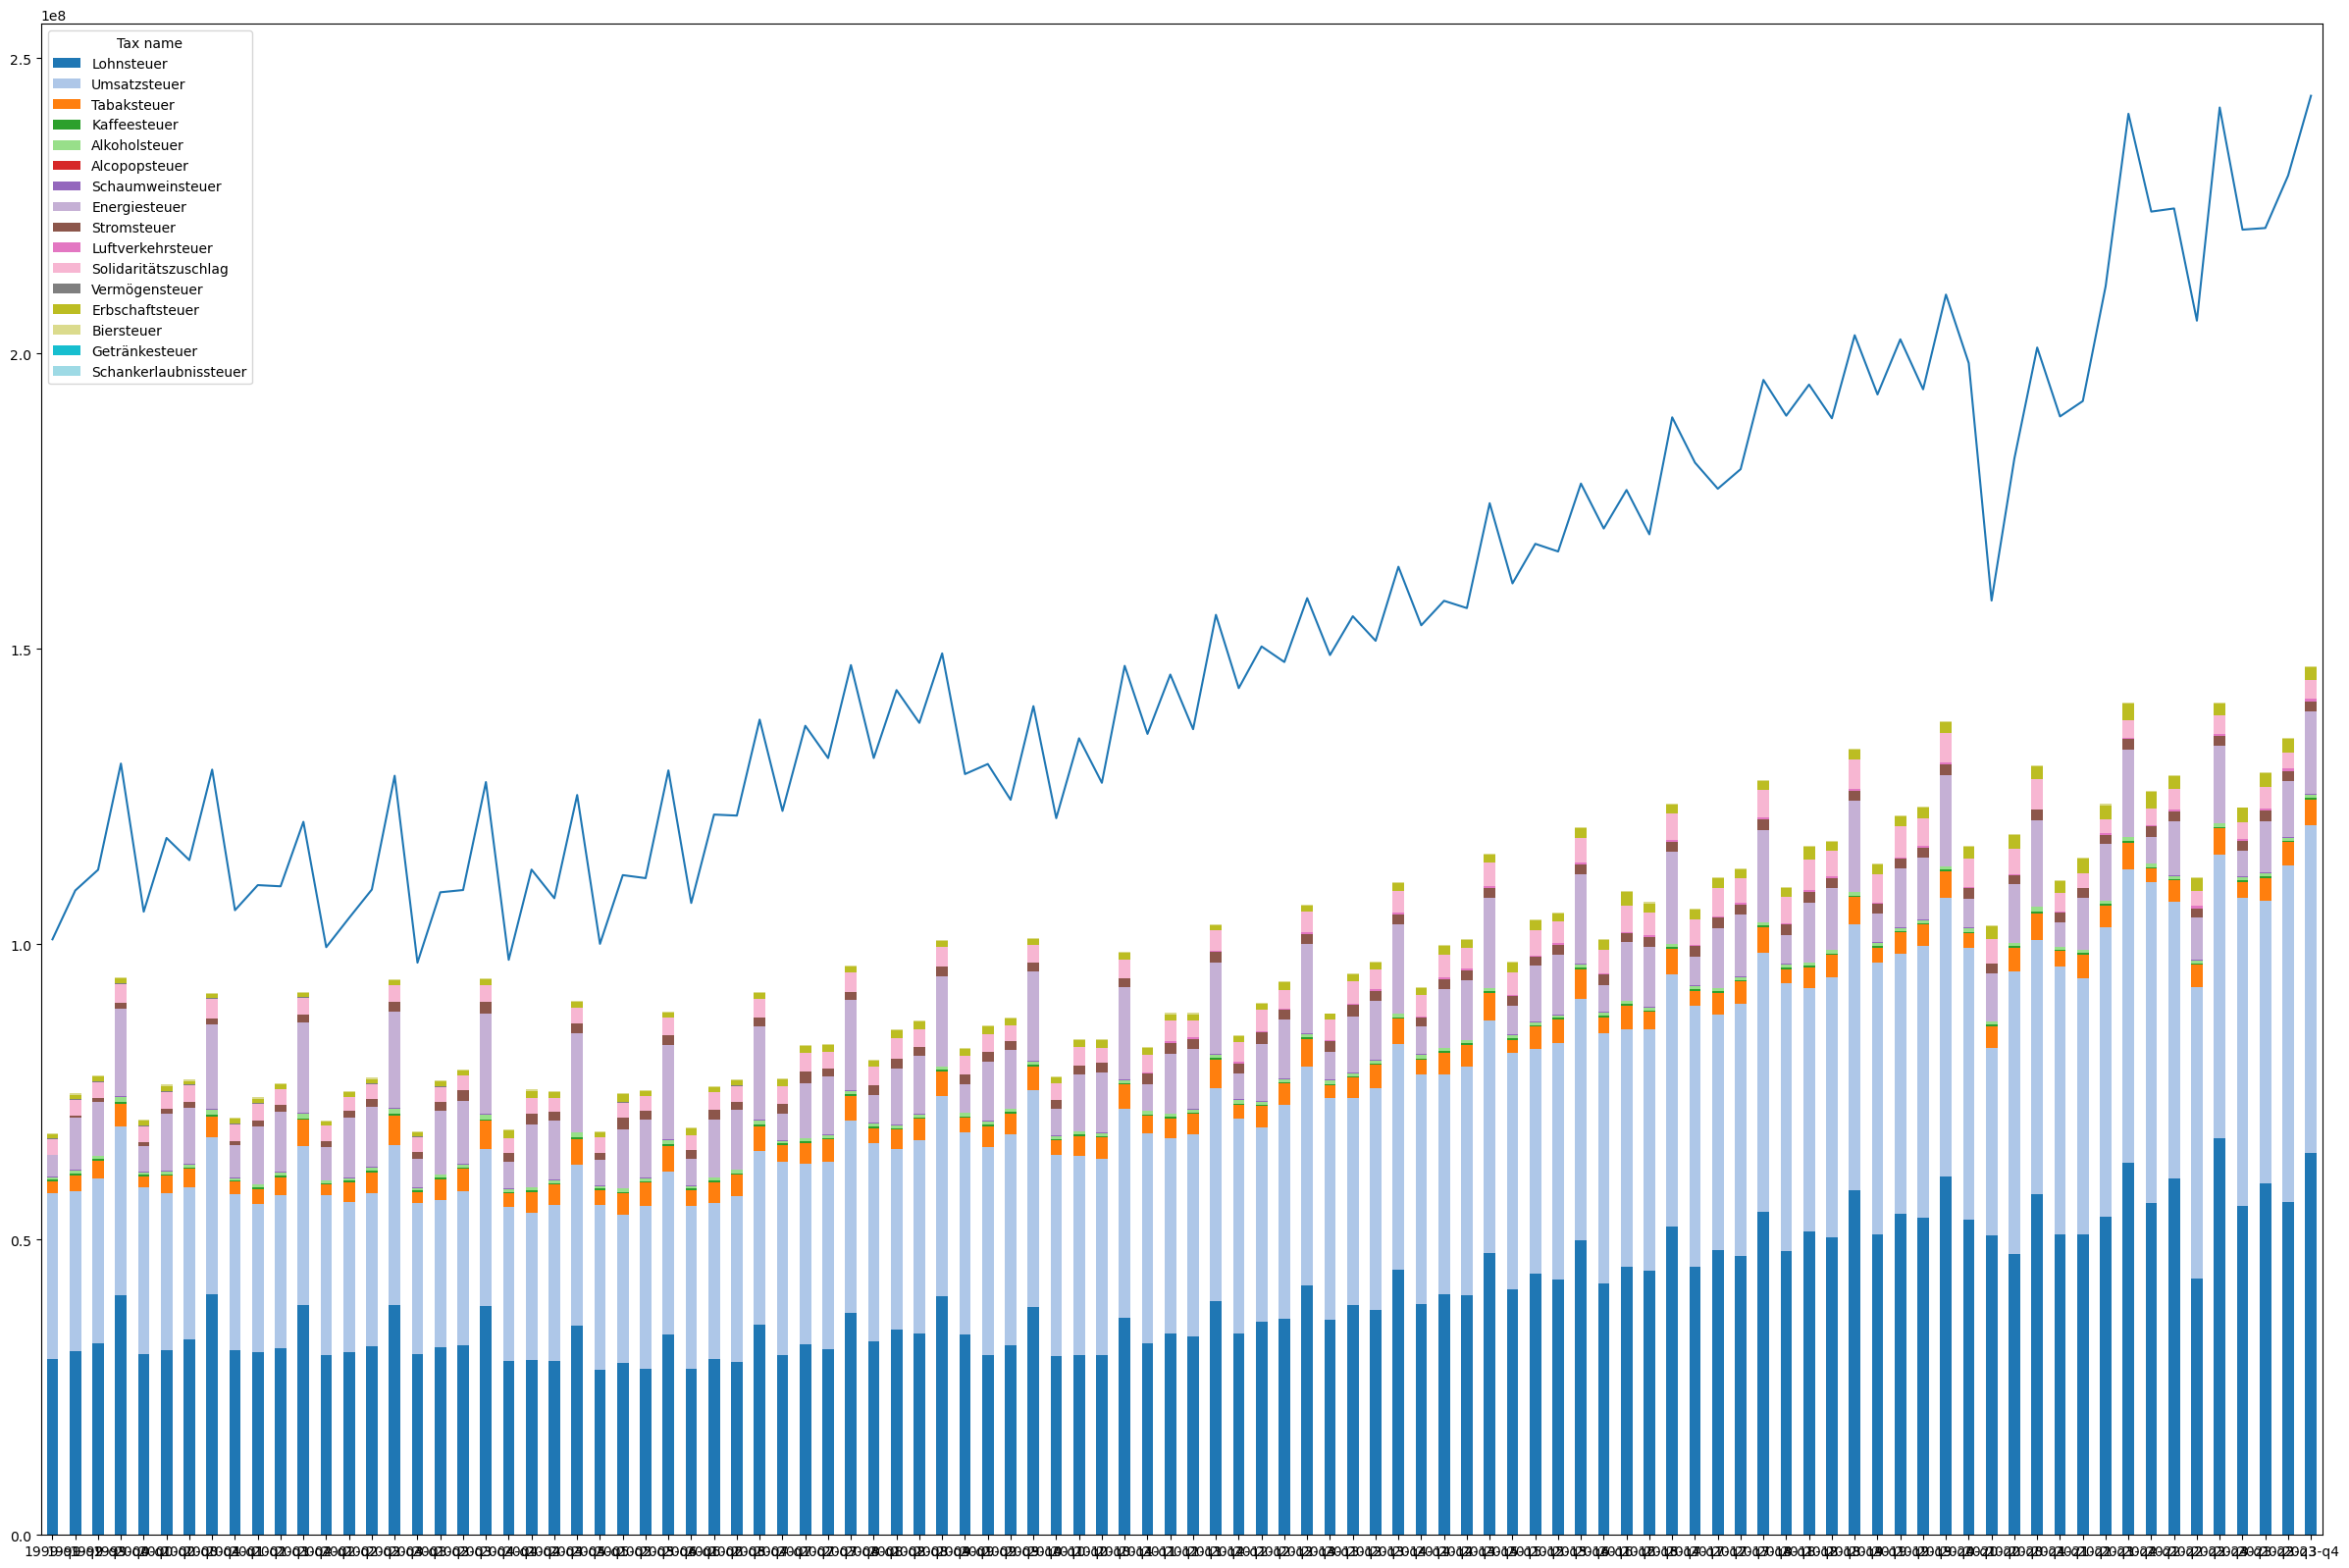

In [242]:
df_q[1:].T.plot(figsize=(30, 20), kind='bar', stacked=True, colormap='tab20')
df_q.iloc[0, :].plot(figsize=(30, 20))

<Axes: >

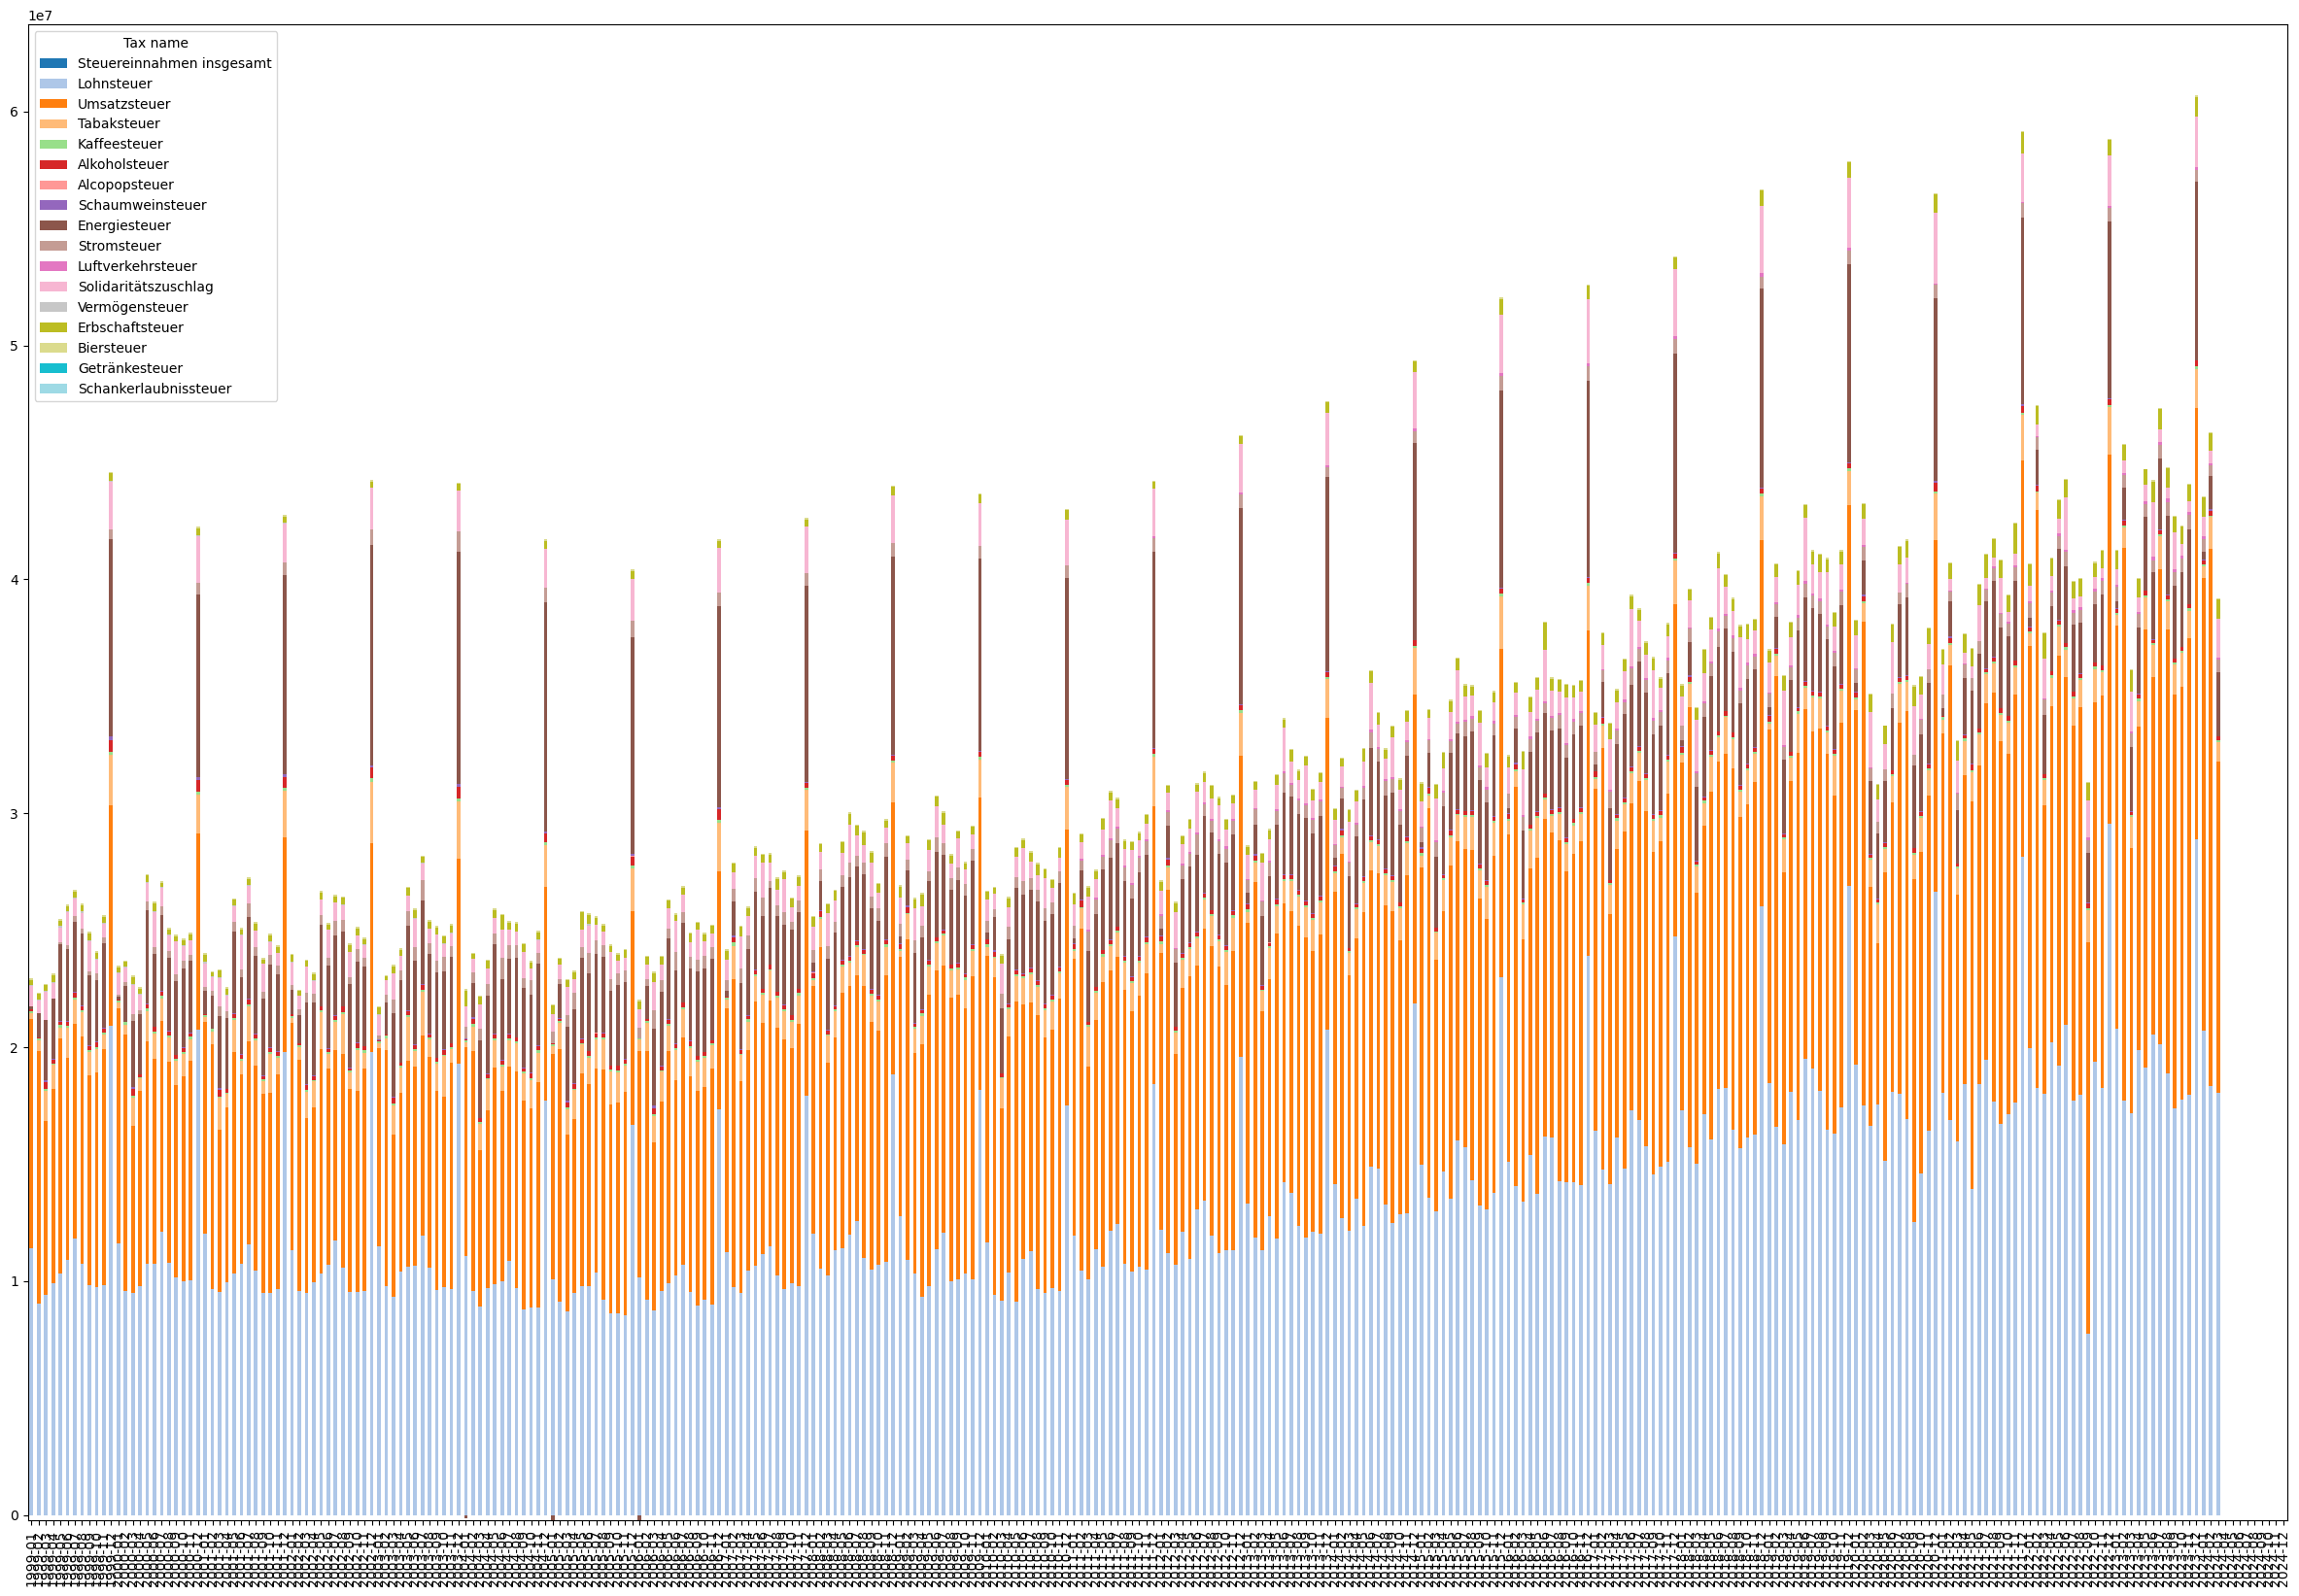

In [247]:
df_m.T.plot(figsize=(30, 20), kind='bar', stacked=True, colormap='tab20')

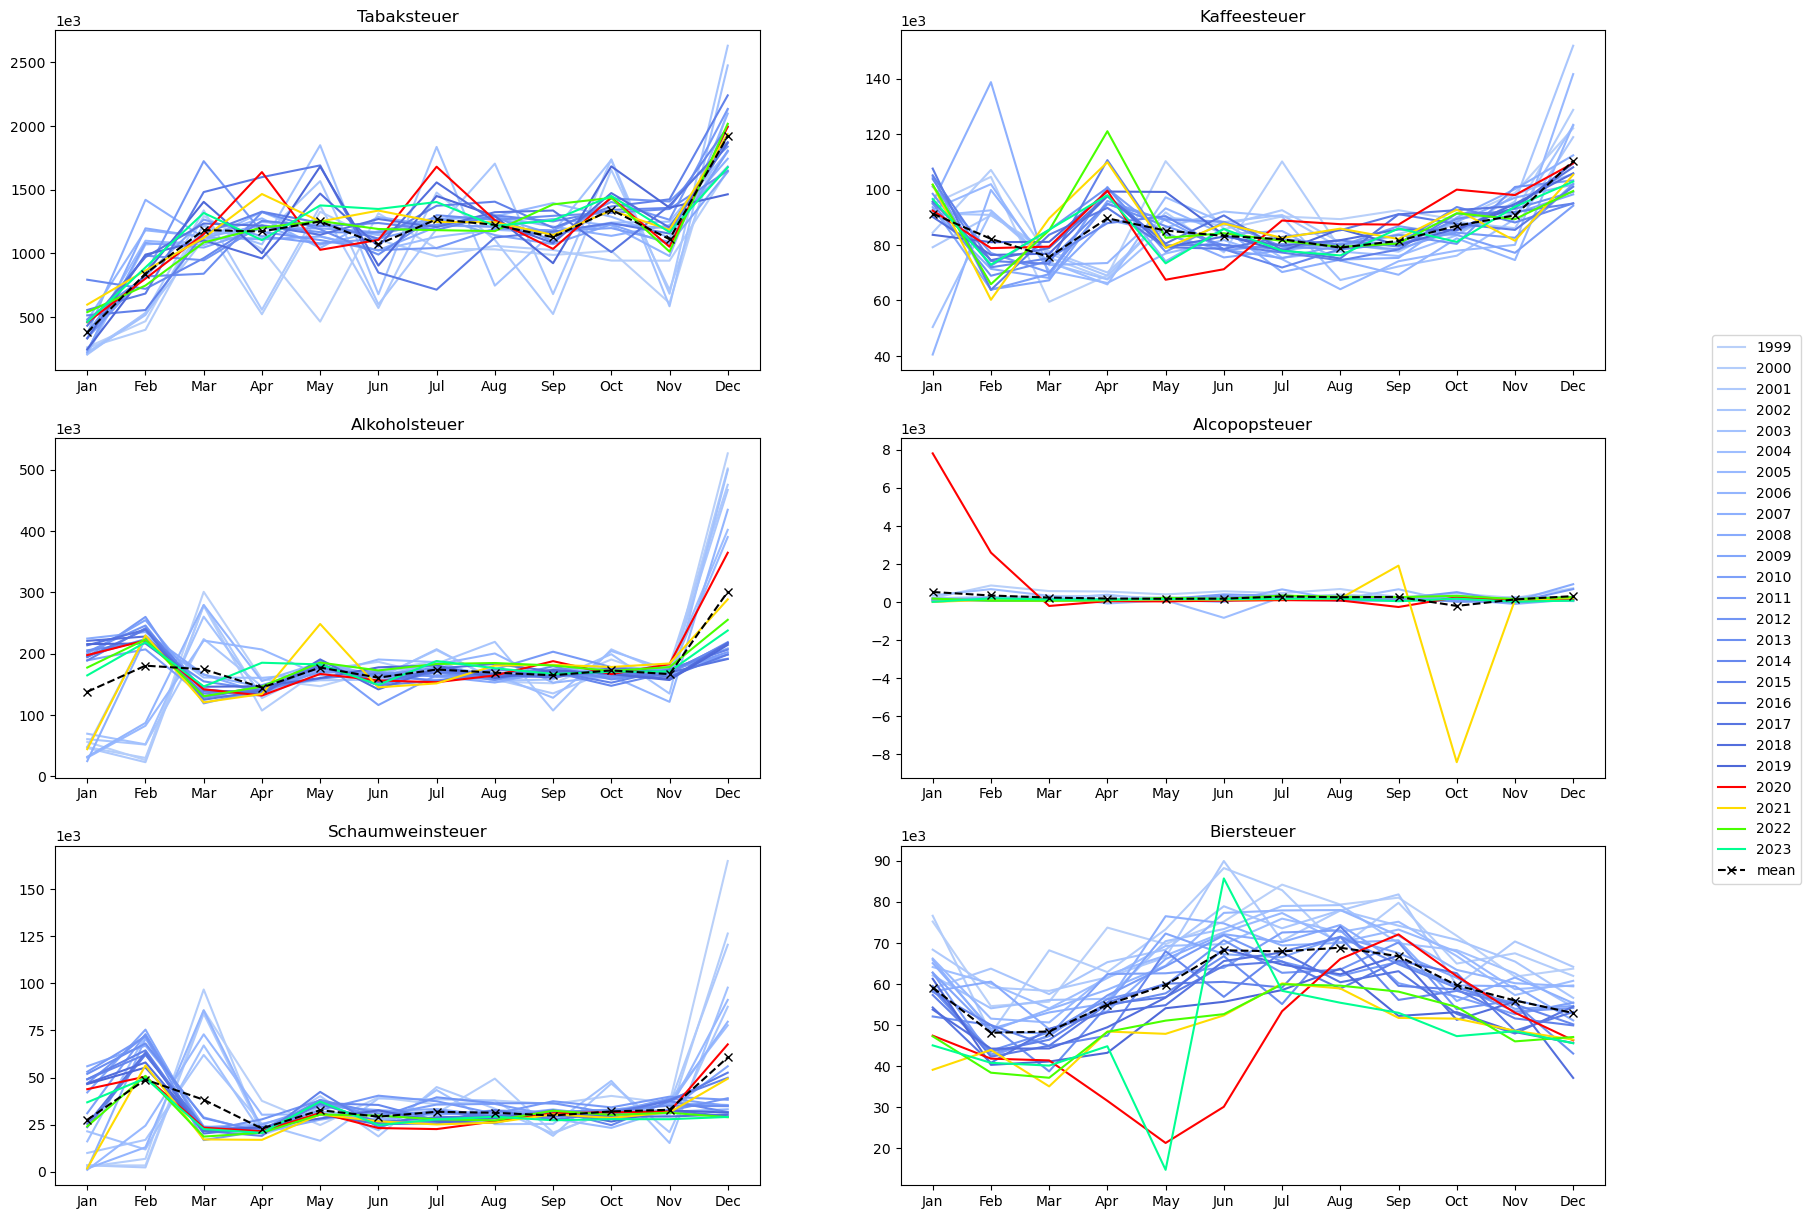

In [139]:
data = [df_m.iloc[5, years*12:years*12+12] for years in range(0, 25)]
fig, ax = plt.subplots(figsize=(20, 15), nrows=3, ncols=2)
consumer_tax_indeces = [3, 4, 5, 6, 7, 14]

for i, tax_index in enumerate(consumer_tax_indeces):
    data = pd.DataFrame(index=range(1999, 2024), columns=range(1, 13))
    for year in range(0, 25):
        data.iloc[year, :] = df_m.iloc[tax_index, year*12:year*12+12]

    colors = iter([plt.cm.coolwarm(a) for a in reversed(range(0, 100, 100//21))])
    covid_colors = iter([plt.cm.hsv(a) for a in range(0, 150, 150//4)])
    plot_loc = (i // 2, i % 2)
    for year in range(0, 25):
        if tax_index == 6 and year < 7:
            continue
        if year > 20:
            ax[plot_loc].plot(range(0, 12), data.iloc[year, :], label=str(1999 + year), color=next(covid_colors), linewidth=1.5)
        else:
            ax[plot_loc].plot(range(0, 12), data.iloc[year, :], label=str(1999 + year), color=next(colors))
    ax[plot_loc].plot(range(0, 12), [data.iloc[:, month].mean() for month in range(0, 12)], 'x--', label='mean', color='black')

    ax[plot_loc].set_title(df_m.index[tax_index])
    ax[plot_loc].ticklabel_format(axis='y', style='sci', scilimits=(3, 3))
    ax[plot_loc].set_xticks(range(0, 12, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

handles, labels = ax[0, 0].get_legend_handles_labels()
plt.figlegend(handles, labels, loc='right')